<p>
<img src="./nlp/imgs/EII-ULPGC-logo.jpeg" width="430px" align="right">


# **Redes neuronales 1**
---

Las redes neuronales artificiales (RNA) constituyen un paradigma de computación inspirado en las <a href="https://es.wikipedia.org/wiki/Neurona">neuronas</a> biológicas y su interconexión. Las neuronas biológicas son células compuestas principalmente de tres partes: soma (cuerpo celular), dendritas (canales de entrada) y axón (canal de salida). Descrito de una forma muy simplificada, las neuronas procesan y transmiten información por medios electroquímicos. Cuando una neurona recibe, a través de las denritas, una cantidad de estímulos mayor a un cierto umbral, ésta se despolariza excitando, a través del axón, a otras neuronas próximas conectadas a través de las sinapsis.

<div style="text-align: center;">
    <img src="imgs/neurona.jpg" width="70%">
</div>

## **La neurona artificial**

Inspirados por esta idea se concibió el modelo de <a href="https://es.wikipedia.org/wiki/Neurona_de_McCulloch-Pitts">neurona artificial</a>. Fundamentalmente, consiste en una unidad de cálculo que admite como entrada un vector de características $\vec{e}$ cuyos valores se suman de forma ponderada mediante un vector de pesos $\vec{w}$ y, si esta suma supera un cierto umbral $\theta$, genera un cierto valor de salida, por ejemplo $1$ y, si no lo supera, genera otro valor, por ejemplo, un $0$.

La expresión matemática básica de la neurona artificial es la siguiente:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} \geq \theta \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Cuando la neurona está sola, es decir, no conectada a otras conformando una red, actúa como un clasificador lineal. 

## **Problemas de clasificación lineal**

Uno de las principales problemas que resuelven las redes neuronales son las tareas de **clasificación**. Pero, ¿en qué consiste? Clasificar es agrupar objetos de categorías similares. Por ejemplo, si tenemos un conjunto de monedas y se nos pide clasificarlas, podemos hacerlo, por ejemplo, por el valor de la moneda. Las de 1€ con las de 1€, las de 50 céntimos con las de 50 céntimos, etc. La propiedad que observamos para agrupar es su valor. Otro ejemplo, podría ser la clasificación de las manzanas atendiendo a su color como "rojas" y "verdes". Es posible también tener en cuenta más de una propiedad del objeto para su clasificación. Por ejemplo, supongamos que se pide clasificar teléfonos móviles como "gama alta" si su cámara supera los 15 megapixeles y además tiene más de 128GB de memoria. Podríamos seguir así y utilizar tantas propiedades de los objetos como queramos para su clasificación. Por tanto, definimos como **vector de características** al vector ordenado de las características o propiedades que se tendrán en cuenta para clasificar un objeto. 


$$ \vec{e} = (e_1, e_2, \dots, e_n) $$

Por tanto, un vector de características "caracteriza" un objeto. En el caso de los móviles, el móvil *A* podría tener como vector de características $\vec{e_A} = (10, 64)$, siendo 10 el número de megapixeles de la cámara y 64 el de megabytes de memoria. El móvil *B* podría ser: $\vec{e_B} = (12, 256)$, el móvil *C*: $\vec{e_C} = (8, 32)$, etc.

Si representamos estos vectores de características como **puntos** en unos ejes de coordenadas cartesianas tendríamos:

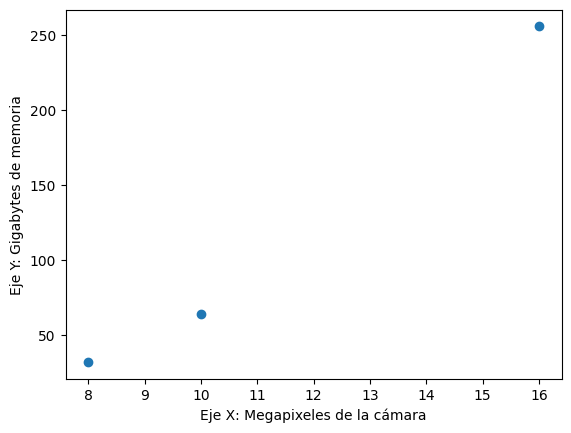

In [5]:
import numpy as np 
from matplotlib import pyplot as plt 

features = [[10,16,8], # megapixeles de la cámara
            [64,256,32] # gigabytes de memoria
           ]

plt.scatter(features[0], features[1])

plt.xlabel("Eje X: Megapixeles de la cámara")
plt.ylabel("Eje Y: Gigabytes de memoria");
 
plt.show()

Si tuviéramos un vector de características con tres propiedades su representación se llevaría a cabo en un espacio tridimensional, y así sucesivamente. 

Bien, pues ahora los móviles que cumplan con la condición anterior de gama alta serán los que aparecen marcados en azul y el resto, en rojo, serán los de gama baja.

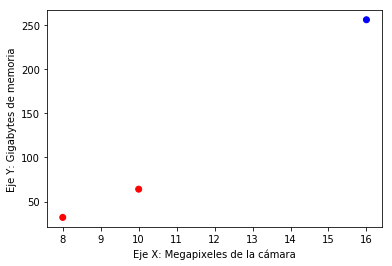

In [8]:
import numpy as np 
from matplotlib import pyplot as plt 

features = [[10,16,8], # megapixeles de la cámara
            [64,256,32]] # gigabytes de memoria
            
classes = []
for e1, e2 in zip(features[0], features[1]):
    if e1>15 and e2>128:
        classes.append('b')
    else:
        classes.append('r')

plt.scatter(features[0], features[1], c = classes)

plt.xlabel("Eje X: Megapixeles de la cámara")
plt.ylabel("Eje Y: Gigabytes de memoria");
 
plt.show()

### **Clasificación lineal**

Supongamos que tenemos ahora un caso más complejo donde los objetos o **ejemplos** (así es como se suelen llamar estos puntos) tengan la siguiente disposición:

<div style="text-align: center;">
    <img src="imgs/set1.png" width="50%">
</div>

> Decimos que un conjunto de ejemplos es **separable linealmente** si podemos trazar una recta (en un espacio tridimensional sería un plano y en un espacio multidimensional sería un hiperplano) que separe a ambas clases o categorías.

<div style="text-align: center;">
    <img src="imgs/set2.png" width="50%">
</div>

Veamos cuándo dos conjuntos (clases o categorías) no son separables linealmente. En este caso, no podemos trazar una recta que separe perfectamente ambos conjuntos.

<div style="text-align: center;">
    <img src="imgs/set3.png" width="50%">
</div>

### **Terminología**

Ahora que ya tenemos claro lo que significa "clasificar", definamos algo de terminología. Cada uno de los puntos u objetos a clasificar se denomina **ejemplo**. El conjunto de todos los ejemplos se denomina **conjunto de datos** (aunque te lo vas encontrar en muchos textos en español con el término anglosajón **dataset**). Todas estos ejemplos pertenecerán a un grupo u otro. A cada uno de estos dos grupos lo denominamos **clase**.

## **El Perceptrón como clasificador lineal**

Volvamos de nuevo a la definición de neurona articial y veamos qué relación tiene con los problemas de clasificación lineal. Recordemos su expresión como la vimos arriba, pero vamos a modificarla ligeramente moviendo $\theta$ a la izquierda del símbolo "mayor o igual", de esta manera:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} - \theta\geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Si queremos, podemos visualizar gráficamente la neurona de esta manera:

<div style="text-align: center;">
    <img src="imgs/model.svg" width="70%">
</div>

Donde la función $g(x)$ tiene la forma "1 si $x\geq 0$ y $0$ si $x<0$". En este caso $x=\sum_{i=1}^{n} {w_i  e_i} - \theta$. Más adelante veremos que $g(x)$ tendrá otras formas. Si estudiamos bien esta fórmula nos daremos cuenta de que se trata de un discriminador lineal. 

Supongamos que tenemos un conjunto de puntos ${a,b,c,d,e}$ en un espacio $R^2$ tal como muestra la figura.

<div style="text-align: center;">
    <img src="imgs/ejemplo1.png" width="40%">
</div>

Algunos de ellos ($a,b,c$) pertencen a una clase (clase 1) y los otros a otra (clase 2). Estas dos regiones están delimitadas por una recta. Nótese que la recta que separa ambas clases no es única, puede ser cualquiera que satisfaga la condición de separación de las clases. Por tanto, tenemos la función de una recta con la ecuación genérica:

$$
y = mx+b 
$$

Haciendo unos cálculos básicos, podemos concretar esta recta como la recta de la figura de ejemplo anterior:

$$
 y = \frac{1}{2} x +1 
$$

Esta recta corresponde al conjunto de todos los puntos $(x,y)$ que satisfacen la **ecuación**. Por ejemplo, el punto $a(2,2)$. Pero vemos que los puntos $b$,$c$,$d$ y $e$ no satisfacen la ecuación. Sin embargo, algunos de ellos, concretamente los puntos $a$,$b$ y $c$ no satisfacen la **ecuación** pero sí satisfarían la **inecuación**:

$$
	y \geq \frac{1}{2} x +1 
$$

Observa entonces que la inecuación separa el espacio en dos subesapcios. Uno de estos subespacios, el sombreado de color celeste, satisface la inecuación, pero el otro subespacio, no.


Operando un poco sobre esta inecuación tendríamos:

$$
	-\frac{1}{2} x + y \geq 1 
$$

Y cambiando la nomenclatura. Es decir, cambiando $x$ por $e_{1}$ e $y$ por $e_{2}$ tenemos:

$$
	-\frac{1}{2} e_{1} + e_{2} \geq 1 
$$

Con lo cual podemos hacer que $w_1 = -\frac{1}{2}$, $w_2 = 1$ y $\theta=1$, que es, justamente, la neurona que actuaría de discriminador lineal de nuestro ejemplo.

El verdadero potencial de la neuronal artificial no está en que calculemos a mano sus pesos y umbral sino en dejar que ella misma "aprenda" esos valores.


## **Aprendizaje**

Antes de meternos de lleno con el aprendizaje vamos a ver antes un par de cosas: la **función sigmoide** y la técnica de **descenso por el gradiente**.


### **Función sigmoide**

Utilizaremos la función **sigmoide** como **función de activación** en lugar de la función "mayor o igual" ya que ofrece una venjata importante: es derivable. Sí, ya sé lo que puedes estar pensando, *¿Y qué pasa con que sea derivable?*. Nos daremos cuenta de eso más adelante.

La función sigmoide tiene la siguiente expresión: 

$$
Sig(x)=\frac{ 1 }{1+{ e }^{ -x }}
$$ 


Y si la representamos gráficamente tiene este aspecto:

<div style="text-align: center;">
    <img src="imgs/sigmoide.png" width="60%">
</div>

Vemos que tiene un rango que va desde $-\infty$ a $\infty$. Si nos fijamos bien, a partir de $-4$ hacia atrás su valor es prácticamente $0$ y a partir del $4$ hacia adelante su valor es prácticamente $1$. Es parecida a la función "mayor o igual" que definimos más arriba. Pero, a diferencia de la función sigmoide, esta tiene una discontinuidad en $0$, como observamos en la expresión y figura siguientes.


$$
f(x) = \begin{cases} \textrm{1, si } x \geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$


<div style="text-align: center;">
	<img src="imgs/mayorigual.png" width="60%">
</div>

La derivada de la función sigmoide es:

$$Sig'(x)=\frac { 1 }{ (1+e^{ x })} -\frac { 1 }{ (1+e^{ x })^{ 2 }  } $$

Puedes hacer los cálculos tú mismo para verificarlo. Además, si reordenamos un poco los términos, surge una propiedad curiosa, y es que podemos expresar la derivada de la sigmoide utilizando la propia sigmoide:

$$Sig'(x)=\frac { 1 }{ (1+e^{ x }) } \left[ 1-\frac { 1 }{ (1+e^{ x }) }  \right] =\frac { 1 }{ (1+e^{ -x }) } \left[ 1-\frac { 1 }{ (1+e^{ -x }) }  \right] =Sig(x)\cdot \left[ 1-Sig(x) \right] $$



### **Descenso por el gradiente**

Supongamos que quiero encontrar el mínimo de una función, por ejemplo: $y=x^2-2x+2$. 

<div style="text-align: center;">
    <img src="imgs/descenso.png" width="30%">
</div>

Lo primero que se nos ocurre es hallar su derivada: $y'=2x-2$, igualar a $0$ y despejar $x$. Lo que nos daría: $x=1$. Supongamos ahora que, por algún motivo, no podemos resolverlo de forma algebraica y lo tenemos que hacer de forma numérica. Es decir, partimos desde algún punto y nos vamos moviendo poco a poco en la dirección de bajada hasta que empecemos a remontar, lo cual quiere decir que hemos alcanzado el mínimo.

In [155]:
def f(x):
    return x**2 -2*x + 2

x = 2.501 # algún punto inicial 
delta = 0.01 # algún valor pequeño

counter = 0
while (f(x) - f(x - delta)) > 0:
    x -= delta # nuevo x
    counter += 1
    
print("Aproximación al mínimo:", x)
print("Pasos:", counter)    

Aproximación al mínimo: 1.0010000000000097
Pasos: 150


Nos han hecho falta 150 pasos para llegar a una aproximación del mínimo con un error menor de $1\%$. Hay otro método mucho más eficiente para llegar a esa aproximación, se llama: **descenso por el gradiente**.

Si nos fijamos en la pendiente de la función, vemos que, a medida que nos alejamos del mínimo, la pendiente (o derivada) es cada vez más pronunciada. Cuando estamos muy cerca del mínimo, la pendiente es casi $0$. El truco del descenso por el gradiente es aprovechar este hecho y utilizar la pendiente como paso (delta) para hacer avanzar la $x$ rápidamente cuando estamos lejos del mínimo y despacio cuando estamos cerca. Veámoslo en el siguiente código.

In [157]:
def f(x):
    return x**2 -2*x + 2

x = 2.501 # algún punto inicial 
delta = 0.01
rho = 0.3

counter = 0
while (f(x) - f(x - delta)) > 0:
    h = (f(x + delta) - f(x - delta)) / (2*delta)  # Cálculo numérico de la derivada en el punto x
    x -= h * rho # nuevo x
    counter += 1
    print("x:", round(x,4) ,"- tamaño del paso:", round(h,4))
    
print("Pasos:", counter) 

x: 1.6004 - tamaño del paso: 3.002
x: 1.2402 - tamaño del paso: 1.2008
x: 1.0961 - tamaño del paso: 0.4803
x: 1.0384 - tamaño del paso: 0.1921
x: 1.0154 - tamaño del paso: 0.0769
x: 1.0061 - tamaño del paso: 0.0307
x: 1.0025 - tamaño del paso: 0.0123
Pasos: 7


Vemos que con esta técnica logramos una aproximación similar... ¡¡en sólo 7 pasos!! 

Hay un parámetro nuevo que ha aparecido, rho ($\rho$). Este parámetro lo llamaremos más adelante **tasa de aprendizaje**. ¿Qué función tiene? Ahora simplemente sirve como un parámetro de escala para el descenso. Observemos la figura siguiente, hay dos funciones que parecen la misma pero que, si nos fijamos bien, están a escalas diferentes. La de la izquierda tiene el mínimo en $x=1$ y la de la derecha en $x=0.1$. Sin embargo, el valor de la derivada en $x=2$ y en $x=0.2$ es el mismo, $2$. Prestemos atención primero a la función de la izquerda. Cuando hagamos el descenso por el gradiente, la nueva $x$ será: $x \leftarrow x - m$, y esto nos llevará a $x=0$. Ahí la pendiente será $m=-2$, lo cual nos llevará de nuevo a $x=2$. Por tanto, necesitamos rebajar la amplitud del paso de alguna forma, y es ahí donde entra en juego el parámetro rho. Si damos a rho, por ejemplo, el valor $0.3$ conseguiremos reducir el paso y aproximarnos correctamente al mínimo. En la función de la derecha ocurre un efecto aún peor. Cuando actualicemos, la nueva $x$ será $x \leftarrow 0.2 - 2$ lo que nos lleva a $x=-1.8$. Es decir, nos estaremos alejando progresivamente del mínimo. De nuevo, rho viene al rescate y si le damos un valor de, por ejemplo, $0.03$ nos estaremos aproximando adecuadamente al mínimo. 

La pregunta que surge es: *¿y cómo sé qué valor debe tener rho?*. La respuesta es que no lo podemos saber *a priori*. Habrá que probar hasta ver que el algoritmo converge.

<div style="text-align: center;">
    <img src="imgs/rho.jpg" width="80%">
</div>


De la misma forma que podemos hacer descenso por el gradiente en una función de una variable $f(x)$, lo podemos hacer en una función con dos variables $f(x,y)$, y con tres, con cuatro, etc. La diferencia está en que ahora usamos **derivadas parciales** en lugar de derivadas. Por ejemplo, supongamos que tenemos la función $f(x,y,z)$, si quieremos hacer descenso por el gradiente tendríamos:

$$
x \leftarrow x - \rho \frac{\partial f(x,y,z)}{\partial x}
$$

$$
y \leftarrow y - \rho \frac{\partial f(x,y,z)}{\partial y}
$$

$$
z \leftarrow z - \rho \frac{\partial f(x,y,z)}{\partial z}
$$

### **Modelo de la neurona con función de activación sigmoide**

Antes vimos el modelo de la neurona articicial de la siguiente forma:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} - \theta\geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Ahora, vamos a hacer algunos cambios "estéticos" a la neurona. Primero, le cambiaremos el nombre a $-\theta$ y la llamaremos $w_0$.

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} + w_0 \geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Si $w_0$ tuviera un valor $e_0$ para poder integrarlo dentro del sumatorio se nos quedaría una representación más compacta. Por tanto, vamos a insertar un $e_0$ que siempre tenga el valor $1$. Así:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} + w_0 e_0 \geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Y ahora sí que podemos dejarlo de una forma más compacta:

$$
f(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=0}^{n} {w_i  e_i} \geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Esta función $f(\textbf{e})$ devuelve un $1$ si $\sum_{i=0}^{n} {w_i  e_i} \geq 0$, y un $0$ cuando $\sum_{i=0}^{n} {w_i  e_i} < 0$. Vemos que no es una función derivable en $x=0$, ya nos daremos cuenta de lo que implica esto. Así que vamos a cambiar esos menores, mayores e iguales por nuestra función sigmoide.

$$
f(\textbf{e}) = Sigmoide(\sum_{i=0}^{n} {w_i  e_i})
$$

De nuevo, esta función es prácticamente $0$ cuando $\sum_{i=0}^{n} {w_i  e_i}$ es menor que $0$ y $1$ en caso contrario. Y, además, es derivables en $x=0$.

Si representamos el perceptrón gráficamente para el caso de dos entradas $e_1$ y $e_2$ tenemos:

<div style="text-align: center;">
    <img src="imgs/perceptron.svg" width="60%">
</div>

### **Aprendizaje**

Veamos el proceso de aprendizaje con un ejemplo muy sencillo. Tenemos un *dataset* formado por tres muestras solamente, donde cada muestra tiene dos propiedades $e_1$ y $e_2$ (además de la correspondiente $e_0$ que siempre es $1$). En la siguiente tabla vemos sus valores y en la figura su representación gráfica. Vemos que hay dos clases, una representada con la etiqueta $1$ y la otra con la etiqueta $0$.

| $e_0$ | $e_1$ | $e_2$ | label |
|-------|-------|-------|-------|
| 1     | 1     | 2     | 1     |
| 1     | 3     | 1     | 1     |
| 1     | 4     | 5     | 0     |


<div style="text-align: center;">
    <img src="imgs/points.png" width="40%">
</div>

El objetivo es encontrar los pesos $w_0$, $w_1$ y $w_2$ de una neuronal artificial para que esta pueda clasificar las muestras correctamente. Este proceso va a ser automático e iterativo. Al principio, la neurona se va a inicializar con valores totalmente aleatorios para los pesos y, posteriormente, se verá qué error ha cometido en la clasificación.

In [129]:
import numpy as np

# Recuerda que la primera columna con unos corresponde a la entrada e0.
x_data = [[1, 1, 2],
          [1, 3, 1],
          [1, 4, 5]]

x_data = np.matrix(x_data)

y_data = [1, 1, 0]

np.random.seed(seed=123)
weights = np.random.uniform(low=-1, high=1, size=3).reshape((3,1))

print("Pesos:", weights)

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

output = sigmoid(x_data * weights)

print("Resultado de la neurona:", output)

Pesos: [[ 0.39293837]
 [-0.42772133]
 [-0.54629709]]
Resultado de la neurona: [[0.24464546]
 [0.1920844 ]
 [0.01713359]]


### **Función de error**

¿Cómo podemos medir el error cometido por la neurona? Para el primer punto $(1,2)$ el resultado debería ser $1$, para el punto $(3,1)$, también $1$. Y, para el punto $(4,5)$, el resultado debería ser $0$. Una forma de medir el error global cometido sería: 

$$ error = \sum_{j=1}^{m} ( \sum_{i=0}^{n} {w_i  e_i^j} - label_j)^2$$

Siendo $m$ el número de muestras que tenemos, en este caso, tres. El error será:

In [138]:
error = np.sum(np.power((output.reshape(3) - y_data),2))

print(error)

1.2235816444340613


Es muy importante entender ahora que **esta función de error está en función de los pesos, no de las muestras**. Las muestras son estáticas, los pesos, no. Los pesos los iremos variando a medida que descendamos por el gradiente. Vemos también que esta función de error es continua y derivable en todo momento. Por eso nos interesaba  prescindir de los anteriores "mayores" y "menores" y quedarmos con una función como la sigmoide, que es continua y derivable.

### **Descendiendo por el gradiente**

<a href="https://www.youtube.com/watch?v=IT2SAiIb7Yk">(vídeo)</a>

Esta función de error decrece cuando los resultados de la neurona se acercan a las etiquetas (*labels*) de cada muestra. Por lo tanto, iremos descenciendo por el gradiente hasta intentar alcanzar el mínimo de esta función. Recordamos que el desceso requiere el cálculo de las derivadas parciales de la función. Vamos a calcularlas.

Llamemos $h_{\vec{w}}$ a la función del perceptrón para un determinado vector (conjunto de pesos) $\vec{w}$


$$h_{\vec{w}}(\vec{e}) = Sig(\sum_{ i=0 }^{ n } w_i e_i)$$


donde $n$ es el número de componentes del vector $\vec{e}$. La salida de $h_{\vec{w}}$ estará comprendida en el intervalo real $(0,1)$ (debido a la la función sigmoide tiene su rango comprendido en el intervalo $(0,1)$). Definimos el error $J$ en función de un conjunto de pesos $\vec{w}$ de la siguiente forma:

$$J(\vec{w}) = \sum _{ i=1 }^{ m } (h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)})^2$$

Donde $m$ es el número de muestras. 

El nuevo conjunto de pesos $\vec{w}$ será actualizado de la siguiente forma

$$\vec{w}_{t+1}  := \vec{w}_t - \gamma  \frac{\partial{J(\vec{w})}}{\partial{\vec{w}}}$$

La constante $\gamma$ se define como "tasa de aprendizaje". Su derivada parcial con respecto a cada componente de $\vec{w}$ será:

$$ 
\frac{\partial J(\vec{w})}{\partial w_j} = \frac{\partial}{\partial w_j}\sum_{ i=1 }^{ m }  (h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)})^2 =$$

$$
\sum_{ i=1 }^{ m }  2(h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \frac{\partial}{\partial w_j} (h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) =
$$

$$
\sum_{ i=1 }^{ m }  2(h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \frac{\partial}{\partial w_j} Sig(\textbf{e}^{(i)} \cdot \vec{w}) =
$$

$$
\sum_{ i=1 }^{ m }  2(h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \; Sig' (\textbf{e}^{(i)} \cdot \vec{w}) \frac{\partial}{\partial w_j} \textbf{e}^{(i)} \cdot \vec{w} =
$$

$$
\sum_{ i=1 }^{ m }  2(h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \; Sig' (\textbf{e}^{(i)} \cdot \vec{w}) \frac{\partial}{\partial w_j} \sum_{k=0}^n e^{(i)}_{k} w_k =
$$

$$
2 \sum_{ i=1 }^{ m }  (h_{\vec{w}}(\textbf{e}^{(i)}) - l^{(i)}) \; Sig' (\textbf{e}^{(i)} \cdot \vec{w}) e^{(i)}_{j} 
$$

## **Código**

Veamos todo el proceso completo en código. Programaremos la función sigmoide y su derivada e iteraremos un determinado número de veces descendiendo por el gradiente de la función de error.

In [139]:
import numpy as np

In [159]:
features = [[1, 2],
          [3, 1],
          [4, 5]]

labels = [1, 1, 0]

In [160]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))


def sigmoid_derivate(o):
    return o * (1.0 - o)

In [164]:
def train(x_data, y_data):

    np.random.seed(seed=123)
    w0, w1, w2 = np.random.rand(3)
    lr = 0.1
    epochs = 10000

    print("Training...")

    for _ in range(epochs):
        
        w0_d = []
        w1_d = []
        w2_d = []
        
        for data, label in zip(x_data, y_data):
            
            e1, e2 = data;
            o = sigmoid(w0*1.0 + w1*e1 + w2*e2)
            aux = 2.*(o - label) * sigmoid_derivate(o)

            w0_d.append(aux * 1.0)
            w1_d.append(aux * e1)
            w2_d.append(aux * e2)
            
        w0 = w0 - np.sum(w0_d) * lr
        w1 = w1 - np.sum(w1_d) * lr
        w2 = w2 - np.sum(w2_d) * lr
        
        
    for data, label in zip(x_data, y_data):
        e1, e2 = data;
        print(data, "->", label)
        o = sigmoid(w0*1.0 + w1*e1 + w2*e2)
        print(o)
        print("-----------------------")
    
    print("Pesos: ", w0, w1, w2)


train(features, labels)

Training...
[1, 2] -> 1
0.973080122635592
-----------------------
[3, 1] -> 1
0.9855133303924121
-----------------------
[4, 5] -> 0
0.01880063364262751
-----------------------
Pesos:  7.9886492208294735 -0.6272766337348483 -1.8868855557655697


Y, finalmente, vemos cómo la neurona ha ajustado sus pesos hasta llevarlos a unos valores que hacen que sus resultados se aproximen mucho a las etiquetas. Si tomamos los pesos ($w_0 \approx 8, w_1 \approx -0.6, w_2 \approx -2$) y los representamos como la típica recta a la que estamos acostumbrados tendremos:

$$ 8e_0 -0.6e_1 -2e_2 = 0 $$

cambiamos los nombres ($e_1 = x, e_2=y$, recuerda que $e_0=1$)...

$$ 8 -0.6x -2y = 0 $$

y despejamos la $y$.

$$ y = -0.3x + 4 $$

Y si representamos la ecuación gráficamente

<img src="imgs/recta.png" width="40%">

Por tanto, la neurona es capaz de clasificar todas las muestras correctamente. Realmente, la neurona no va a devolver un $1$ si la etiqueta es un $1$, pero sí un valor muy cercano. Así, si la neurona devuelve un valor mayor que $0.5$ decimos que la muestra la etiqueta como $1$. Y la etiqueta como $0$ en caso contrario.

Lo que acabamos de ver se conoce como **aprendizaje supervisado**. Consiste en que un modelo, en este caso una neurona, se adapta (aprende sus pesos) para clasificar un conjunto de datos etiquetados. Ahora, si aparecieran nuevos puntos no etiquetados, la neurona sabría cómo clasificarlos correctamente.

## **Ejercicios**

- Una vez tenemos la neurona entrenada, crea un script en Python que calcule el resultado de la clasificación de los puntos $(5,5), (4,2), (0,1)$.
- ¿Qué ocurre con los puntos que están cerca de la recta? Como, por ejemplo, el punto $(0,4)$
- Compara los pasos de la derivación parcial junto con el descenso por el gradiente e indetifica cada paso del algoritmo con el código en Python.
- ¿Qué pasaría si hubiéramos mantenido la función de activación "mayor que" en lugar de la función sigmoide? ¿Cómo sería la función de error? Razona la respuesta.



<iframe id="inlineFrameExample"
    style="border:0px"
    title="Inline Frame Example"
    width="100%"
    height="700"
    src="https://cayetanoguerra.github.io/ia/sim/canvas.html">
</iframe>